# Machine Learning
## Trabajo MDS - 2o. Trim. ==> Inmigracion en Chile

**Profesor:** Graells, E..<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.

<p><img src="ML1_diag.png"></p>

### Pregunta:
`En cuales comunas se concentran los inmigrantes que llegaron a la Región Metropolitana? Quien son? Y los nuevos, dónde y cómo vivirán?`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore")

## 1. Importar el dataset

Vamos a usar datos limpios obtenidos a partir del notebook: [Análisis exploratorio de los datos: 01-VISA-EDA.ipynb](https://github.com/Mjrovai/UDD_Master_Data_Science/blob/master/Trabajo%20-%20Inmigracion/01-VISA-EDA.ipynb). 

El Departamanto de Extranjeria y Migracion de Chile, aclara que si bien las bases se presentan de manera separada por tratarse de distintos tipos de permiso, ellas no constituyen universos distintos de inmigrantes. Un inmigrante en Chile para obtener una permanencia definitiva DEBE haber obtenido con anterioridad una visa, por lo que las bases de permanencias definitivas se conforman de personas que están contabilizadas en las visas. <br>
<br>Así, para una mejor lectura de los datos haremos una distinción en términos de migración transitoria y migración permanente. Se considerará que las visas corresponden a migración transitoria, pues los permisos duran entre uno y dos años. Las personas que sean titulares de una visa, para quedarse por un plazo mayor a dos años, deben solicitar un permiso de permanencia definitiva, de otra manera deben abandonar el país.<br>
- En este trabajo focaremos en la MIGRACIÓN DEFINITIVA, que están relacionadas a las Permisos de Residencia Definitiva
- Y se complementará esa información con la migración reciente, es decir, las visas otorgadas los dos últimos años (2017/2018).

**Información constante del dataset final** <br><br>
Las planillas de permisos migratorios contienen los siguientes datos, los cuales son extraídos de los formularios establecidos para solicitar residencia, disponibles en la página web del Departamento de Extranjería y Migración, de los cuales utilizamos:
- PAIS	     (País de origen)
- SEXO	
- EDAD	     (la edad en el año que recibió el benefício)
- ESTUDIOS	
- ACTIVIDAD	
- BENEFICIO	 (Visa temporária o definitiva)
- ANIO	     (año en que recibió el benefício)
- COMUNA

In [2]:
!ls ./data

inmigrantes_data_comunas_rm_4ML.xlsx inmigrantes_rm_comuna.xlsx


In [3]:
df = pd.read_excel('./data/inmigrantes_data_comunas_rm_4ML.xlsx')
df.shape #(493638, 8)

(493638, 8)

In [4]:
df.head(2)

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,BENEFICIO,ANIO,COMUNA
0,peru,femenino,32,no informa,empleado,definitiva,2006,santiago
1,ecuador,masculino,58,no informa,empleado,definitiva,2007,providencia


In [5]:
df.COMUNA.value_counts()

santiago               139050
independencia           31260
las condes              30910
estacion central        25981
recoleta                24026
providencia             18646
nunoa                   16559
quilicura               14982
quinta normal           13083
la florida              11654
maipu                   10203
san bernardo             9376
san miguel               8619
penalolen                8477
conchali                 8270
puente alto              7569
colina                   7472
lo barnechea             7050
melipilla                6960
vitacura                 6552
macul                    6216
cerro navia              6018
pudahuel                 5832
lo prado                 5754
san joaquin              5267
la cisterna              5208
pedro aguirre cerda      4982
renca                    4280
cerrillos                4090
lo espejo                4034
la reina                 3931
huechuraba               3570
lampa                    3554
el bosque 

## 2. Preproceso para aplicación de modelos de ML

In [6]:
df.COMUNA.value_counts()[0:19].sum()/df.COMUNA.value_counts().sum()

0.8106081784627601

81% de los estrangeros viven en las 19 comunas mas populosas

In [7]:
df.COMUNA.value_counts()[0:19]

santiago            139050
independencia        31260
las condes           30910
estacion central     25981
recoleta             24026
providencia          18646
nunoa                16559
quilicura            14982
quinta normal        13083
la florida           11654
maipu                10203
san bernardo          9376
san miguel            8619
penalolen             8477
conchali              8270
puente alto           7569
colina                7472
lo barnechea          7050
melipilla             6960
Name: COMUNA, dtype: int64

In [8]:
df.PAIS.value_counts()[0:19].sum()/df.PAIS.value_counts().sum()

0.9727999060039948

97% de los extranjeros vienen de 19 países

In [9]:
df.PAIS.value_counts()[0:19]

peru                       133949
venezuela                  108870
haiti                       77041
colombia                    60876
bolivia                     16164
argentina                   15983
ecuador                     15055
china republica popular      8738
espana                       8200
brasil                       7048
republica dominicana         5909
cuba                         5467
estados unidos               3931
uruguay                      2905
mexico                       2829
francia                      2446
paraguay                     1675
alemania                     1571
italia                       1554
Name: PAIS, dtype: int64

### Reducir el numero de categorias encontrado en COMUNA. 
- Definamos 20 categorías para comunas, definindo labels especifico que contengan 80% extranjeros y un label "otras'

In [10]:
def simplificaComuna(text):
    text = text.split(' ')
    if 'santiago' in text: text = 'santiago'
    elif 'independencia' in text: text= 'independencia'
    elif 'condes' in text: text= 'las condes'
    elif 'estacion' in text: text= 'estacion central'
    elif 'recoleta' in text: text= 'recoleta'
    elif 'providencia' in text: text= 'providencia'
    elif 'nunoa' in text: text= 'nunoa'
    elif 'quilicura' in text: text= 'quilicura'
    elif 'quinta' in text: text= 'quinta normal'
    elif 'florida' in text: text= 'la florida'
    elif 'maipu' in text: text= 'maipu'
    elif 'bernardo' in text: text= 'san bernardo'
    elif 'miguel' in text: text= 'san miguel'
    elif 'penalolen' in text: text= 'penalolen'
    elif 'conchali' in text: text= 'conchali'
    elif 'puente' in text: text= 'puente alto'
    elif 'colina' in text: text= 'colina'
    elif 'barnechea' in text: text= 'lo barnechea'
    elif 'melipilla' in text: text= 'melipilla'
    else: text = 'otras'
    return text 

In [11]:
data = df.copy()
data['COMUNA'] = data.COMUNA.apply(simplificaComuna)

In [12]:
data.COMUNA.value_counts()

santiago            139050
otras                93491
independencia        31260
las condes           30910
estacion central     25981
recoleta             24026
providencia          18646
nunoa                16559
quilicura            14982
quinta normal        13083
la florida           11654
maipu                10203
san bernardo          9376
san miguel            8619
penalolen             8477
conchali              8270
puente alto           7569
colina                7472
lo barnechea          7050
melipilla             6960
Name: COMUNA, dtype: int64

### Reducir el numero de categorias encontrado en PAIS. 
- Definamos 20 categorías para pais de origen, definindo labels especificos que contengan 97% extranjeros y un label "otros'

In [13]:
def simplificaPais(text):
    text = text.split(' ')
    if 'peru' in text: text = 'peru'
    elif 'venezuela' in text: text= 'venezuela'
    elif 'haiti' in text: text= 'haiti'
    elif 'colombia' in text: text= 'colombia'
    elif 'bolivia' in text: text= 'bolivia'
    elif 'argentina' in text: text= 'argentina'
    elif 'ecuador' in text: text= 'ecuador'
    elif 'china' in text: text= 'china'
    elif "espana" in text: text= "espana"
    elif 'brasil' in text: text= 'brasil'
    elif 'dominicana' in text: text= 'dominicana'
    elif 'cuba' in text: text= 'cuba'
    elif 'estados' in text: text= 'eua'
    elif 'uruguay' in text: text= 'uruguay'
    elif 'mexico' in text: text= 'mexico'
    elif 'francia' in text: text= 'francia'
    elif 'paraguay' in text: text= 'paraguay'
    elif 'alemania' in text: text= 'alemania'
    elif 'italia' in text: text= 'italia'
    else: text = 'otros'
    return text 

In [14]:
data['PAIS'] = data.PAIS.apply(simplificaPais)

In [15]:
data.PAIS.value_counts()

peru          133949
venezuela     108870
haiti          77041
colombia       60876
bolivia        16164
argentina      15983
ecuador        15055
otros          13427
china           8738
espana          8200
brasil          7048
dominicana      5909
cuba            5467
eua             3931
uruguay         2905
mexico          2829
francia         2446
paraguay        1675
alemania        1571
italia          1554
Name: PAIS, dtype: int64

### Converter variables continuas en categoricas

In [16]:
data['EDAD'].describe()

count    493638.000000
mean         34.050582
std          10.233022
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         118.000000
Name: EDAD, dtype: float64

In [17]:
data['EDAD'] = pd.cut(data['EDAD'], 
                      bins = [17, 35, 65, 120],
                      labels = ['18-34', '35-64', '65+'])

In [18]:
data['ANIO'].describe()

count    493638.000000
mean       2015.503492
std           3.310910
min        2005.000000
25%        2015.000000
50%        2017.000000
75%        2018.000000
max        2018.000000
Name: ANIO, dtype: float64

In [19]:
data['ANIO'] = pd.cut(data['ANIO'], 
                      bins = [2004, 2010, 2017, 2019],
                      labels = ['2005-09', '2010-16', '2017+'])

In [20]:
data.reset_index(drop = True, inplace=True)

In [21]:
data.head()

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,BENEFICIO,ANIO,COMUNA
0,peru,femenino,18-34,no informa,empleado,definitiva,2005-09,santiago
1,ecuador,masculino,35-64,no informa,empleado,definitiva,2005-09,providencia
2,brasil,masculino,18-34,no informa,empresario,definitiva,2005-09,las condes
3,bolivia,femenino,35-64,no informa,autonomo,definitiva,2005-09,otras
4,otros,femenino,35-64,no informa,inactivo,definitiva,2005-09,santiago


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493638 entries, 0 to 493637
Data columns (total 8 columns):
PAIS         493638 non-null object
SEXO         493638 non-null object
EDAD         493638 non-null category
ESTUDIOS     493638 non-null object
ACTIVIDAD    493638 non-null object
BENEFICIO    493638 non-null object
ANIO         493638 non-null category
COMUNA       493638 non-null object
dtypes: category(2), object(6)
memory usage: 23.5+ MB


# Codificar variables categoricas/texto en numericas - Label Encoder

In [23]:
data1 = data.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
pai = LabelEncoder(); data1['PAIS'] = pai.fit_transform(data.PAIS)
sex = LabelEncoder(); data1['SEXO'] = sex.fit_transform(data.SEXO)
eda = LabelEncoder(); data1['EDAD'] = eda.fit_transform(data.EDAD)
est = LabelEncoder(); data1['ESTUDIOS'] = est.fit_transform(data.ESTUDIOS)
act = LabelEncoder(); data1['ACTIVIDAD'] = act.fit_transform(data.ACTIVIDAD)
ben = LabelEncoder(); data1['BENEFICIO'] = ben.fit_transform(data.BENEFICIO)
ani = LabelEncoder(); data1['ANIO'] = ani.fit_transform(data.ANIO)
com = LabelEncoder(); data1['COMUNA'] = com.fit_transform(data.COMUNA)

In [26]:
data1.sample(5)

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,BENEFICIO,ANIO,COMUNA
389060,17,1,0,1,2,1,1,16
137700,18,1,0,3,2,0,1,10
188213,17,1,0,5,2,0,1,5
147825,2,1,0,3,2,0,1,2
460958,17,0,1,0,2,1,2,3


## 3. Preparar la data: 

### Dividir la data, sacando la variable target

In [27]:
X = data1.copy()

In [28]:
y = X.pop('COMUNA').values

In [29]:
y

array([19, 12,  5, ..., 16,  3, 10])

In [30]:
X.head(2)

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,BENEFICIO,ANIO
0,17,0,0,3,2,0,0
1,8,1,1,3,2,0,0


## 4. Testando vários modelos de ML

En se tratando de clasificación se hará testes con los seguintes modelos:
- Naive Bayes
- Decision Trees
- Randon Forest
- Logistic Regression
- K-NN
- SVC (nota: Este modelo llevó horas y no se mostró mejor que los anteriores, por lo que será descartado por ahora)

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### NAIVE BAYES

In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.2839518677578802

==> Model Score: 0.285 **Resultado: Malo** pero rápido

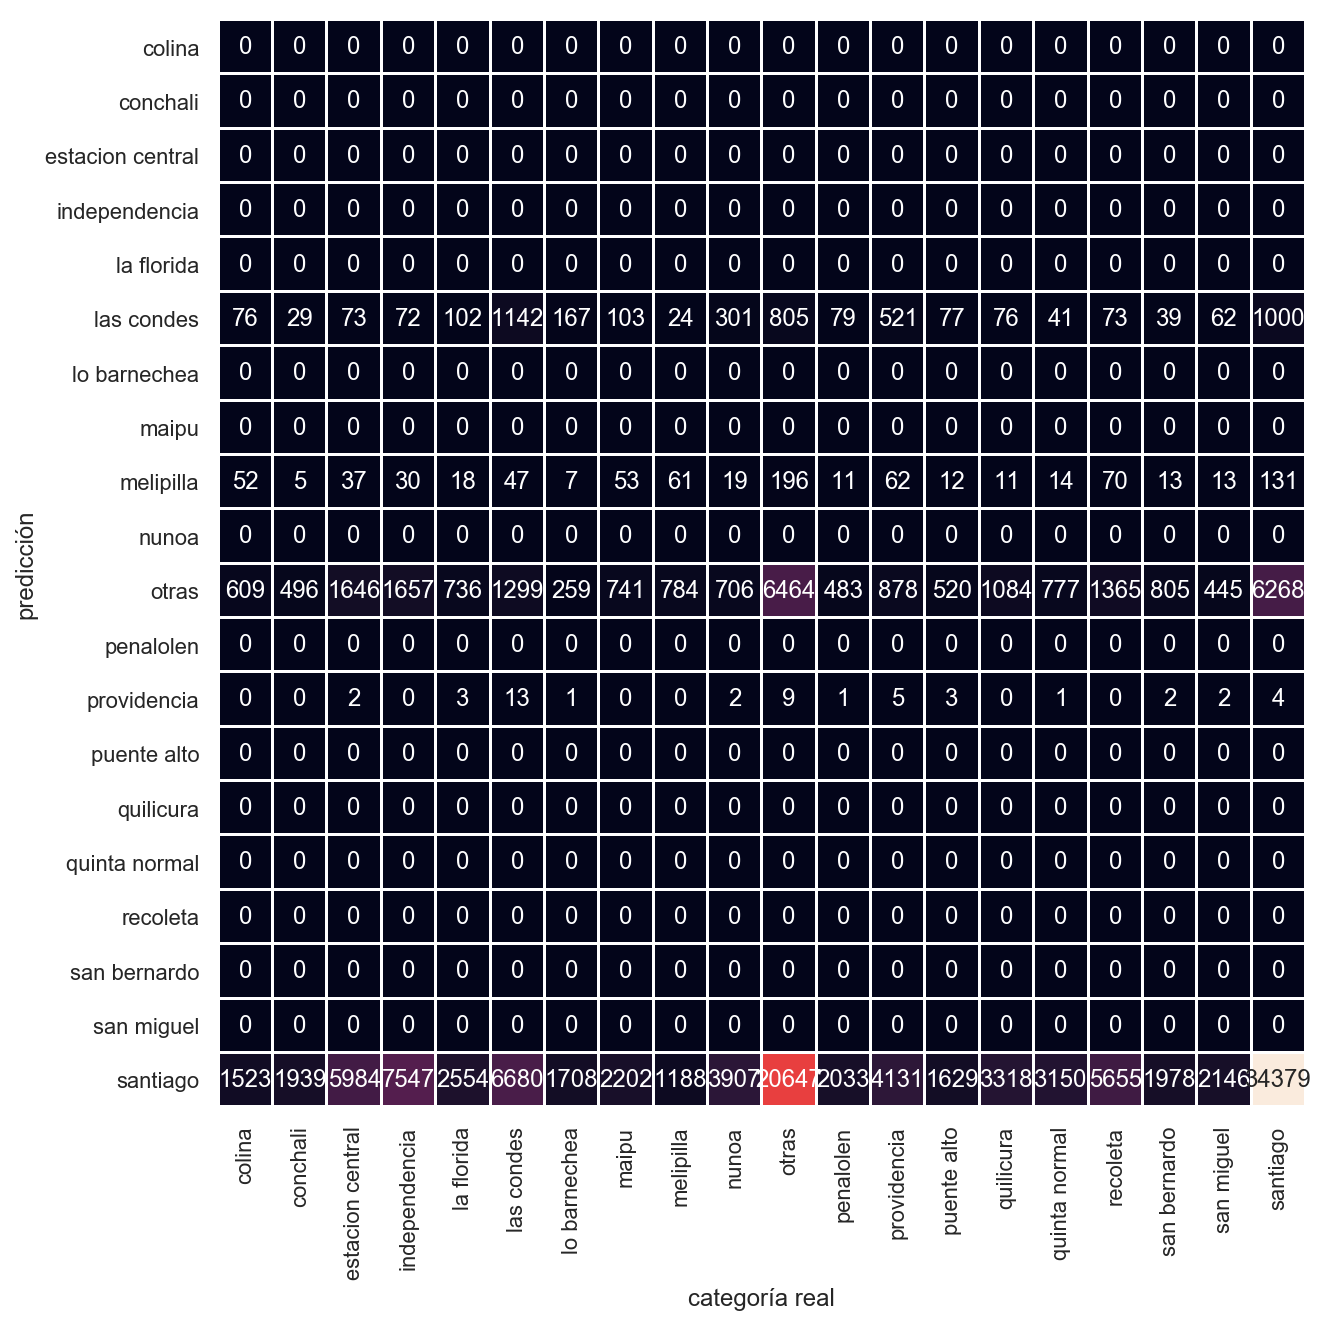

In [34]:
plt.figure(figsize = (11,10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, linewidth=1,
            xticklabels=com.classes_, yticklabels=com.classes_)

plt.xlabel('categoría real')
plt.ylabel('predicción');

### DECISION TREES

In [35]:
from sklearn.tree import DecisionTreeClassifier  
model = DecisionTreeClassifier() 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.33542662669151607

### RANDON FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, criterion='gini')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.3401973097804068

- n_estimators=10 (default) ==>  Model Score: 0.3362 **Resultado: Malo**
- n_estimators=20           ==>  Model Score: 0.3391 **Resultado: Malo**
- n_estimators=30           ==>  Model Score: 0.3381 **Resultado: Malo**
- n_estimators=50           ==>  Model Score: 0.3365 **Resultado: Malo**
- criterion default es 'gini'. Cambiando a 'entropy' praticamente no produce diferencia. 

### LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.2930576938659752

==> Model Score: 0.2927 **Resultado: Malo** pero rápido

### K-NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier  
model = KNeighborsClassifier(n_neighbors=10) 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.3012620533182076

- k = 5 ==> 0.2379
- k = 10 ==> 0.2821

### SVC

# Codificar variables categoricas/texto en numericas - One Hot Encoder

## 5. Preparar la data: 

### Dividir la data, sacando la variable target

In [43]:
data.head()

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,BENEFICIO,ANIO,COMUNA
0,peru,femenino,18-34,no informa,empleado,definitiva,2005-09,santiago
1,ecuador,masculino,35-64,no informa,empleado,definitiva,2005-09,providencia
2,brasil,masculino,18-34,no informa,empresario,definitiva,2005-09,las condes
3,bolivia,femenino,35-64,no informa,autonomo,definitiva,2005-09,otras
4,otros,femenino,35-64,no informa,inactivo,definitiva,2005-09,santiago


In [44]:
X = data.copy()
y = X.pop('COMUNA').values
y

array(['santiago', 'providencia', 'las condes', ..., 'recoleta',
       'independencia', 'otras'], dtype=object)

In [45]:
X.head(2)

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,BENEFICIO,ANIO
0,peru,femenino,18-34,no informa,empleado,definitiva,2005-09
1,ecuador,masculino,35-64,no informa,empleado,definitiva,2005-09


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

#### Creación de los pipelines de pre-processing para los datos categoricos y numericos

In [47]:
categorical_features = ['PAIS', 'SEXO', 'EDAD', 'ESTUDIOS', 'ACTIVIDAD', 'BENEFICIO', 'ANIO']

In [48]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)]) 

## 6 Testando vários modelos de ML

### NAIVE BAYES

In [49]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [50]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.323


==> Model Score: 0.323 **Resultado: Malo**

### DECISION TREES

In [51]:
from sklearn.tree import DecisionTreeClassifier  
model = DecisionTreeClassifier() 

In [52]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.337


==> Model Score: 0.325 **Resultado: Malo**

### RANDON FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30, criterion='gini')

In [54]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.338


==> Model Score: 0.340 **Resultado: Malo**

### LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')

In [56]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.341


==> Model Score: 0.341 **Resultado: Malo**